<a href="https://colab.research.google.com/github/nitinpatil301a/Deep-learning-youtube/blob/master/Age_prediction_using_inception_net_on_image_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link:-http://aicip.eecs.utk.edu/wiki/UTKFace

<img src='http://yeephycho.github.io/blog_img/Inception_v4.jpg'>

In [1]:
%tensorflow_version 2.0.0
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0" 
import tensorflow as tf
from keras import Sequential,Model,models
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.applications.inception_resnet_v2 import InceptionResNetV2 , preprocess_input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


Using TensorFlow backend.


In [0]:
folder_path = '/content/drive/My Drive/age_prediction_from_image_dataset/images'
img_width=224
img_height=224

In [3]:
str="1_0_0_20161219140623097.jpg"
str.split("_",1)[0]

'1'

In [4]:
import os
images = []
target=[]
for img_name in os.listdir(folder_path):
    img = os.path.join(folder_path, img_name)
    img = image.load_img(img, target_size=(img_width,img_height))
    img = image.img_to_array(img)
    img=img/255.0
    print(img_name, "  ",img_name.split("_",1)[0])
    images.append(img)
    target.append(img_name.split("_",1)[0])

#data=pd.DataFrame(images,columns=['images','target'])
images=np.array(images,dtype=np.float)
target=np.array(target,dtype=np.int)

23_0_0_20170116221005536.jpg    23
23_0_0_20170116221006990.jpg    23
23_0_0_20170116221012037.jpg    23
23_0_0_20170116221018206.jpg    23
23_0_0_20170116221708213.jpg    23
23_0_0_20170116221710870.jpg    23
23_0_0_20170116221722978.jpg    23
23_0_0_20170117134919191.jpg    23
23_0_0_20170117144111812.jpg    23
23_0_0_20170117144116074.jpg    23
23_0_0_20170117144406947.jpg    23
23_0_0_20170117144642723.jpg    23
23_0_0_20170117144439657.jpg    23
23_0_0_20170117144526121.jpg    23
23_0_0_20170117144517953.jpg    23
23_0_0_20170117144550331.jpg    23
23_0_0_20170117144545593.jpg    23
23_0_0_20170117144552915.jpg    23
23_0_0_20170117144555155.jpg    23
23_0_0_20170117144618155.jpg    23
23_0_0_20170117144620972.jpg    23
23_1_1_20170113010455151.jpg    23
23_0_0_20170117144622811.jpg    23
24_0_0_20170102233329675.jpg    24
23_1_2_20170116173039449.jpg    23
24_0_0_20170104004125063.jpg    24
24_0_0_20170104002326444.jpg    24
24_0_0_20170104165239658.jpg    24
24_0_0_2017010423010

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(images,target, test_size=0.20, random_state=5)

In [6]:
inception_arch=InceptionResNetV2(input_shape=(img_width,img_height,3),weights="imagenet",include_top=False)

219062272/219055592 [==============================] - 2s 0us/step


In [7]:
cnt=0
for layers in inception_arch.layers:
  if cnt<750:
    layers.trainable=False
  cnt+=1
cnt

780

In [0]:
model = Sequential()
model.add(inception_arch)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='linear'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 5, 5, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              39322624  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 93,660,385
Trainable params: 46,060,609
Non-trainable params: 47,599,776
_________________________________________________________________


In [0]:
model.compile(optimizer="adam",loss="mse",metrics=['mae'])

In [11]:

history=model.fit(X_train,y_train,batch_size=50,validation_data=(X_valid,y_valid),epochs=100)

Train on 1640 samples, validate on 411 samples
Epoch 1/100
1640/1640 [==============================] - 28s 17ms/step - loss: 1147.7322 - mae: 24.1935 - val_loss: 808.8455 - val_mae: 22.5364
Epoch 2/100
1640/1640 [==============================] - 10s 6ms/step - loss: 579.0517 - mae: 20.9488 - val_loss: 807.7366 - val_mae: 22.5117
Epoch 3/100
1640/1640 [==============================] - 10s 6ms/step - loss: 577.9602 - mae: 20.9225 - val_loss: 806.5034 - val_mae: 22.4843
Epoch 4/100
1640/1640 [==============================] - 10s 6ms/step - loss: 576.7872 - mae: 20.8945 - val_loss: 805.2182 - val_mae: 22.4557
Epoch 5/100
1640/1640 [==============================] - 10s 6ms/step - loss: 575.5726 - mae: 20.8657 - val_loss: 803.8995 - val_mae: 22.4264
Epoch 6/100
1640/1640 [==============================] - 10s 6ms/step - loss: 574.3346 - mae: 20.8358 - val_loss: 802.5525 - val_mae: 22.3963
Epoch 7/100
1640/1640 [==============================] - 10s 6ms/step - loss: 573.0777 - mae: 20.80

array([[3.1238742]], dtype=float32)

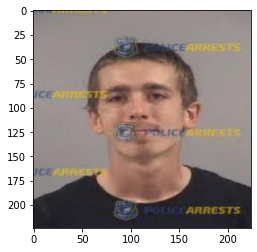

In [12]:
img=image.load_img("/content/drive/My Drive/age_prediction_from_image_dataset/images/23_0_0_20170116221006990.jpg",target_size=(img_width,img_height))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255.0
img = np.expand_dims(img, axis=0)
img_class=model.predict(img)
img_class